# Respon Modul 1
<h3> Import Library

In [8]:
import matplotlib.pyplot as plt
import cv2 as cv
import pandas as pd
import numpy as np

# Nomor 1
Menampilkan citra `respon.jpg` yang mewakili masing masing 3 channel warna (RGB/BGR) serta tampilkan masing masing histogram warnanya

<h3> Membaca dan Menampilkan Gambar

[[[  8  66 104]
  [  9  67 105]
  [ 10  68 105]
  ...
  [ 40  57  77]
  [ 39  56  76]
  [ 39  56  76]]

 [[  8  66 104]
  [  9  67 105]
  [ 10  68 105]
  ...
  [ 40  57  77]
  [ 39  56  76]
  [ 39  56  76]]

 [[  8  66 104]
  [  9  67 105]
  [  9  69 105]
  ...
  [ 39  57  79]
  [ 38  56  78]
  [ 39  57  79]]

 ...

 [[ 22  43  44]
  [ 27  48  49]
  [ 23  42  46]
  ...
  [ 17  45  57]
  [ 17  45  57]
  [ 18  46  58]]

 [[ 24  48  48]
  [ 25  46  49]
  [ 21  40  46]
  ...
  [ 17  45  57]
  [ 17  45  57]
  [ 18  46  58]]

 [[ 24  48  48]
  [ 18  42  44]
  [ 28  47  54]
  ...
  [ 17  45  57]
  [ 17  45  57]
  [ 18  46  58]]]


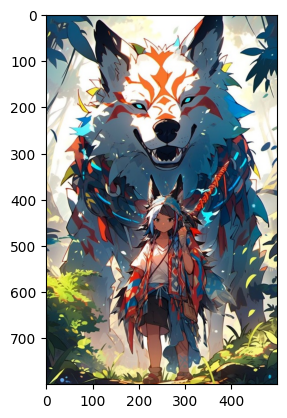

In [9]:
image = plt.imread("respon.jpg")
plt.imshow(image)
print(image)

<h3> Menampilkan gambar dengan masing masing warna 

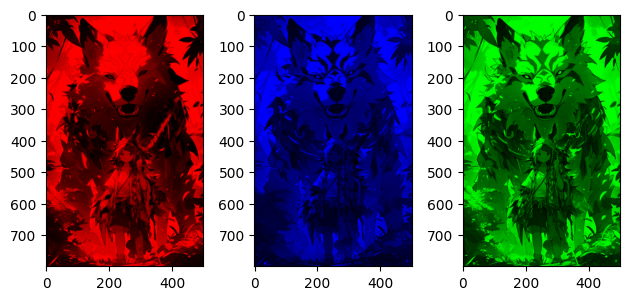

In [10]:
tinggi,lebar = image.shape[:2]
imageBlue = np.zeros((tinggi,lebar,3)).astype(int)
imageRed = np.zeros((tinggi,lebar,3)).astype(int)
imageGreen = np.zeros((tinggi,lebar,3)).astype(int)

for i in range (tinggi):
    for j in range (lebar):
        r, g, b = image[i,j]
        imageRed[i,j] = [r,0,0]
        imageGreen[i,j] = [0,g,0]
        imageBlue[i,j] = [0,0,b]
plt.subplot(131)
plt.imshow(imageRed)
plt.subplot(132)
plt.imshow(imageBlue)
plt.subplot(133)
plt.imshow(imageGreen)
plt.tight_layout()

<h3> Menampilkan histogram dari masing masing gambar

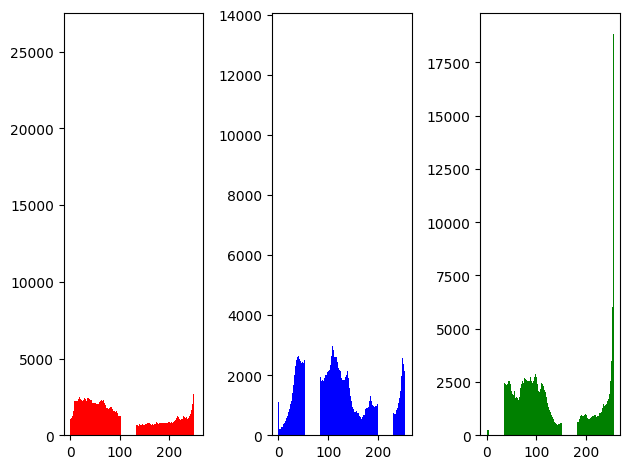

In [11]:
hist_red = np.zeros(256, dtype=int)
hist_green = np.zeros(256, dtype=int)
hist_blue = np.zeros(256, dtype=int)

for i in range(tinggi):
    for j in range(lebar):
        r, g, b = imageRed[i, j]
        hist_red[r] += 1

        r, g, b = imageGreen[i, j]
        hist_green[g] += 1

        r, g, b = imageBlue[i, j]
        hist_blue[b] += 1
        
plt.subplot(131)
plt.bar(range(256), hist_red, color="red")
plt.subplot(132)
plt.bar(range(256), hist_blue, color="blue")
plt.subplot(133)
plt.bar(range(256), hist_green, color="green")
plt.tight_layout()


# Nomor 2
Membuat method `image-zooming` untuk Operasi Dasar Penskalaan Citra/Pengubahan ukuran Citra yang dapat merubah ukuran citra menjadi lebih besar ataupun lebih kecil.
   - Menggunakan method `image-zooming` pada citra `respon.jpg` yang telah digrayscale untuk memperbesar dan memperkecil ukuran citranya **(Note: faktor skala bebas)**
   - tampilkan hasil gambarnya lalu bandingkan histogramnya.

<h3> Mengubah gambar dalam bentuk grayscale

[[71 72 72 ... 61 60 60]
 [71 72 72 ... 61 60 60]
 [71 72 73 ... 62 61 62]
 ...
 [41 46 41 ... 45 45 46]
 [45 45 40 ... 45 45 46]
 [45 40 47 ... 45 45 46]]


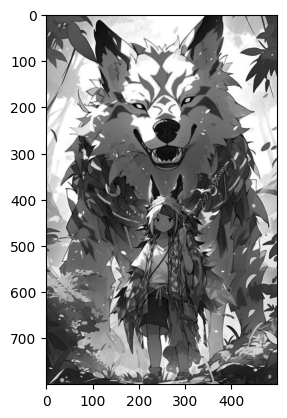

In [12]:
grayimage = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
plt.imshow(grayimage,cmap="gray")
print(grayimage)

<h3> memperbesar dan memperkecil ukuran citra

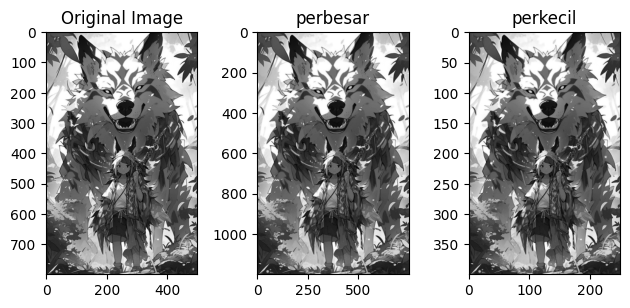

In [13]:
def image_zooming(image, scale_factor):
    tinggi, lebar = image.shape[:2]
    
    new_tinggi = int(tinggi * scale_factor)
    new_lebar = int(lebar * scale_factor)
    
    resized_image = cv.resize(image, (new_lebar, new_tinggi), interpolation=cv.INTER_LINEAR)
    
    return resized_image

# Memperbesar citra
perbesar = image_zooming(grayimage, 1.5)

# Memperkecil citra
perkecil = image_zooming(grayimage, 0.5) 

plt.subplot(131)
plt.imshow(grayimage, cmap="gray")
plt.title("Original Image")

plt.subplot(132)
plt.imshow(perbesar, cmap="gray")
plt.title("perbesar")

plt.subplot(133)
plt.imshow(perkecil, cmap="gray")
plt.title("perkecil")

plt.tight_layout()

<h3> Menampilkan Histogram dari masing masing gambar

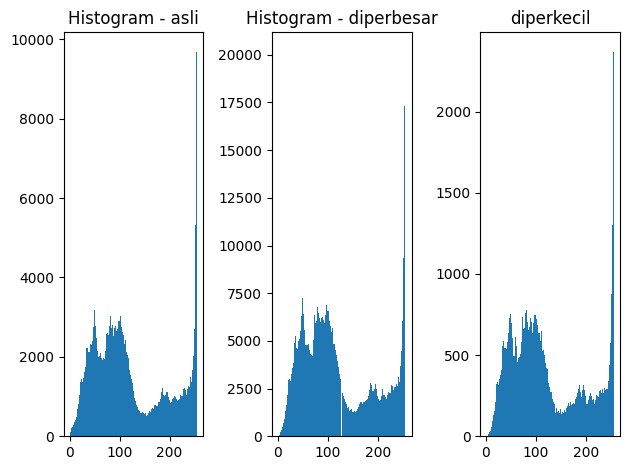

In [14]:
plt.subplot(131)
plt.hist(grayimage.ravel(), bins=256)
plt.title("Histogram - asli")

plt.subplot(132)
plt.hist(perbesar.ravel(), bins=256)
plt.title("Histogram - diperbesar")

plt.subplot(133)
plt.hist(perkecil.ravel(), bins=256)
plt.title("diperkecil")
plt.tight_layout()